In [39]:
#Имопортирую библиотеки
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Настраиваю отображение пандас
pd.options.display.max_rows = 150
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'


In [2]:
#Импортирую файл CSV и задаю формат в столбце с датами
#Можно использовать'%Y-%m-%d %H:%M:%S'
dateparse = lambda dates: [pd.datetime.strptime(d, '%d/%m/%Y') for d in dates]
FB = pd.read_csv('2019Jan-2020Mar.csv', sep = ';', parse_dates=['Date'], date_parser = dateparse)
#Если файл уже импортирован можно поменять формат даты используя
#FB['Date'] = pd.to_datetime(FB.Date, format='%d/%m/%Y')
print(FB[0:1])


        Date           Client Facebook Business  \
0 2019-08-15  Victorsirfok707 [400481263815666]   

                           Client Facebook Transaction External Id  \
0  Victorsirf3 [2809608942442524]                              NaN   

  Facebook Transaction Tracking Id Facebook Transaction Card Number  \
0                              NaN                              NaN   

  Facebook Transaction Card Expire Facebook Transaction Status  \
0                              NaN                         NaN   

  Facebook Transaction Payment Option Facebook Transaction Charge Type  \
0                                 NaN                              NaN   

   Traffic Cost  Transaction Amount  App Transaction Amount  Duty  \
0   3847.128249            2916.148                2916.148   0.0   

   Traffic Cost Diff  
0         930.980249  


In [3]:
#Проверяю файл 
FB

,Date,Client Facebook Business,Client,Facebook Transaction External Id,Facebook Transaction Tracking Id,Facebook Transaction Card Number,Facebook Transaction Card Expire,Facebook Transaction Status,Facebook Transaction Payment Option,Facebook Transaction Charge Type,Traffic Cost,Transaction Amount,App Transaction Amount,Duty,Traffic Cost Diff
0,2019-08-15,Victorsirfok707 [400481263815666],Victorsirf3 [2809608942442524],NaN,NaN,NaN,NaN,NaN,NaN,NaN,3847.128249,2916.148000,2916.148000,0.0,930.980249
1,2019-08-01,Sergzancorp [608945712932343],Familinimenov2 [583488745513428],NaN,NaN,NaN,NaN,NaN,NaN,NaN,20181.889728,0.000000,0.000000,0.0,20181.889728
2,2019-08-02,Sergzancorp [608945712932343],Familinimenov2 [583488745513428],NaN,NaN,NaN,NaN,NaN,NaN,NaN,21250.976940,57450.600000,57450.600000,0.0,36199.623060
3,2019-08-03,Sergzancorp [608945712932343],Familinimenov2 [583488745513428],NaN,NaN,NaN,NaN,NaN,NaN,NaN,12291.086922,0.000000,0.000000,0.0,12291.086922
4,2019-08-04,Belovasyamir [337457893796463],Belovasyamir3 [718435595278213],NaN,NaN,NaN,NaN,NaN,NaN,NaN,2607.670382,2089.239136,2089.239136,0.0,518.431246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81939,2020-03-30,Davbm [1847181382079036],Dav 3 [2329384764021292],NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.347250,0.000000,0.000000,0.0,214.347250
81940,2020-03-31,La 1 [154524329068897],La 1.4 [231006188046618],NaN,NaN,NaN,NaN,NaN,NaN,NaN,6749.366208,0.000000,0.000000,0.0,6749.366208
81941,2020-03-23,Nekkar [420233915451612],Tap1 [2594737367441430],NaN,NaN,NaN,NaN,NaN,NaN,NaN,3530.310640,0.000000,0.000000,0.0,3530.310640
81942,2020-03-23,Замки [135327387539202],Замки 5 [194503775031621],NaN,NaN,NaN,NaN,NaN,NaN,NaN,37538.268512,0.000000,0.000000,0.0,37538.268512


In [4]:
FB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81944 entries, 0 to 81943
Data columns (total 15 columns):
Date                                   81944 non-null datetime64[ns]
Client Facebook Business               81944 non-null object
Client                                 81944 non-null object
Facebook Transaction External Id       38637 non-null object
Facebook Transaction Tracking Id       37421 non-null object
Facebook Transaction Card Number       36669 non-null object
Facebook Transaction Card Expire       35583 non-null object
Facebook Transaction Status            38637 non-null object
Facebook Transaction Payment Option    38637 non-null object
Facebook Transaction Charge Type       38637 non-null object
Traffic Cost                           81944 non-null float64
Transaction Amount                     81944 non-null float64
App Transaction Amount                 81944 non-null float64
Duty                                   81944 non-null float64
Traffic Cost Diff        

In [5]:
#Создаю переменные пандас (таблицы с днями и клиентами, и 1 таблица день + клиент)
#И просматриваю итоговую переменную
Days = FB.loc[:,'Date']
Clients = FB.loc[:,'Client']
DandC= FB.loc[:,['Date','Client','Traffic Cost']]
DandC

,Date,Client,Traffic Cost
0,2019-08-15,Victorsirf3 [2809608942442524],3847.128249
1,2019-08-01,Familinimenov2 [583488745513428],20181.889728
2,2019-08-02,Familinimenov2 [583488745513428],21250.976940
3,2019-08-03,Familinimenov2 [583488745513428],12291.086922
4,2019-08-04,Belovasyamir3 [718435595278213],2607.670382
...,...,...,...
81939,2020-03-30,Dav 3 [2329384764021292],214.347250
81940,2020-03-31,La 1.4 [231006188046618],6749.366208
81941,2020-03-23,Tap1 [2594737367441430],3530.310640
81942,2020-03-23,Замки 5 [194503775031621],37538.268512


In [6]:
#Группирую статистику по клиентам, для понимания сколько клиентов работало за весь период
n = Clients.nunique()
print(n)

8922


In [7]:
#Сортирую статистику по Client по критерию - Date и формирую список строк,
Stata2 = DandC.groupby('Date')['Client'].nunique()

#Перевожу таблицу в формат пандас
print(Stata2)
print(type(Stata2))
Stata2 = pd.DataFrame(Stata2)
print(type(Stata2))

#Индекс не дефолтный, сбрасываю индекс на дефолтный и проверяю формат
Stata2.reset_index(level = ['Date'], inplace =True)
print(Stata2)
Stata2.info()

Date
2019-01-01     10
2019-01-02     11
2019-01-03     12
2019-01-04     12
2019-01-05     10
             ... 
2020-03-27    389
2020-03-28    417
2020-03-29    388
2020-03-30    447
2020-03-31    444
Name: Client, Length: 456, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
          Date  Client
0   2019-01-01      10
1   2019-01-02      11
2   2019-01-03      12
3   2019-01-04      12
4   2019-01-05      10
..         ...     ...
451 2020-03-27     389
452 2020-03-28     417
453 2020-03-29     388
454 2020-03-30     447
455 2020-03-31     444

[456 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 2 columns):
Date      456 non-null datetime64[ns]
Client    456 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.2 KB


In [8]:
#Сортирую по Дате и проверяю, если изменений нет то группировка прошла хорошо и все ок
Stata2.sort_values(by=['Date'])
print(Stata2[30:])

          Date  Client
30  2019-01-31       5
31  2019-02-01       7
32  2019-02-02       7
33  2019-02-03       7
34  2019-02-04       8
..         ...     ...
451 2020-03-27     389
452 2020-03-28     417
453 2020-03-29     388
454 2020-03-30     447
455 2020-03-31     444

[426 rows x 2 columns]


Max = 534
Min = 5
Mean = 106.5
Median = 139.65350877192984


(array([17897, 17987, 18078, 18170, 18262, 18352]),
 <a list of 6 Text xticklabel objects>)

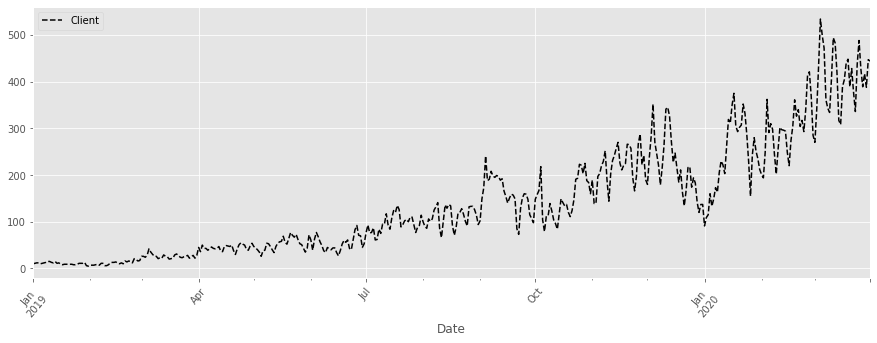

In [40]:
#Имея обработанные данные формирую график плотности потока данных в день
#считаю максимум, минимум, медиану и среднее, создаю переменную в пандас, это больше для понимания диапазона
Clmax = Stata2.Client.max()
Clmin = Stata2.Client.min()
Clmean =Stata2.Client.median()
Clmedian = Stata2.Client.mean()
print(str('Max = ') + str(Clmax))
print(str('Min = ') + str(Clmin))
print(str('Mean = ') + str(Clmean))
print(str('Median = ') + str(Clmedian))


Stata2.plot(x = 'Date', y = 'Client', style='k--')
plt.xticks(rotation = 50)

In [41]:
print(Stata2[300:])

          Date  Client
300 2019-10-28     225
301 2019-10-29     188
302 2019-10-30     184
303 2019-10-31     160
304 2019-11-01     189
..         ...     ...
451 2020-03-27     389
452 2020-03-28     417
453 2020-03-29     388
454 2020-03-30     447
455 2020-03-31     444

[156 rows x 2 columns]
